## Practice
1. Input images from webcam.
2. Use <b>MediaPipe()</b> to peform face detection.
3. Find the coordinates of 6 FaceKeyPoint: (RIGHT_EYE,LEFT_EYE,NOSE_TIP,MOUTH_CENTER,RIGHT_EAR_TRAGION,LEFT_EAR_TRAGION)
4. Draw a triangle using three points: RIGHT_EYE, LEFT_EYE, MOUTH_CENTER
5. Optional: Use <i>cv2.arrowedLine()</i> to indicate the normal direction of the face. (hint: a vector from the center of the triangle to the NOSE_TIP)
6. Show the output image.
7. Upload your Jupyter code file (*.ipynb)

In [6]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils


mp_face = mp.solutions.face_detection.FaceDetection(
    model_selection=1,
    min_detection_confidence=0.5 
)
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
while True:
    ret, frame = cap.read()
    
    results = mp_face.process(frame)
    height = frame.shape[0]
    weight = frame.shape[1]
    if not results.detections:
        print('No faces detected.')
    else:
        for detection in results.detections: # iterate over each detection and draw on image
            mp_drawing.draw_detection(frame, detection)
            points = detection.location_data.relative_keypoints
            re1 = points[1].x*weight
            re2 = points[1].y*height
            le1 = points[0].x*weight
            le2 = points[0].y*height
            m1 = points[3].x*weight
            m2 = points[3].y*height
            frame = cv2.line(frame, (int(re1),int(re2)), (int(le1),int(le2)), (0,255,0), 1)
            frame = cv2.line(frame, (int(re1),int(re2)), (int(m1),int(m2)), (0,255,0), 1)
            frame = cv2.line(frame, (int(le1),int(le2)), (int(m1),int(m2)), (0,255,0), 1)
    
    cv2.imshow('output', frame)
    c = cv2.waitKey(1)
    #press esc to quit 
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()
    

## output example
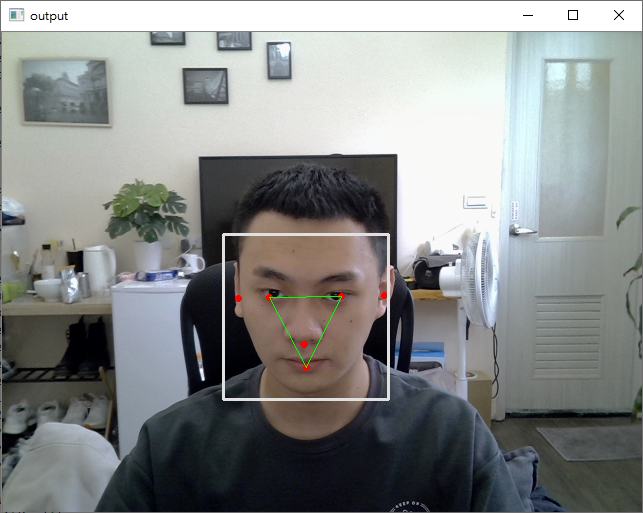